In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def k_means(data, k, max_iters=100, tolerance=1e-4, random_state=None):
    if random_state:
        np.random.seed(random_state)

    n_samples, n_features = data.shape
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break

        centroids = new_centroids

    return centroids, labels

In [3]:
file_path = "/content/kmeans2d.npy"
data = np.load(file_path)
print(f"Shape: {data.shape}")

Shape: (300, 2)


In [9]:
k = 3
centroids, labels = k_means(data, k, random_state=42)

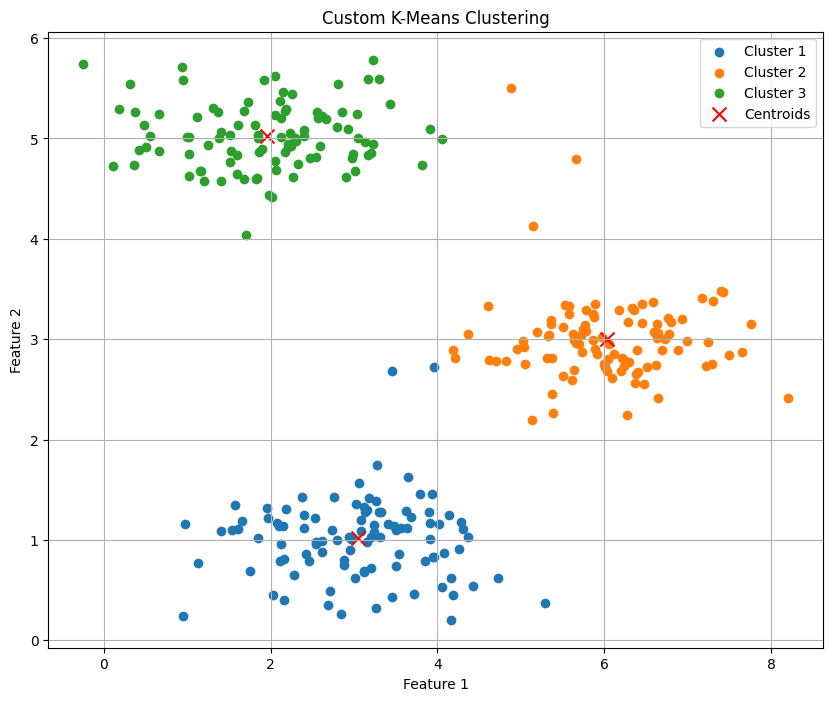

In [11]:
plt.figure(figsize=(10, 8))
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("Custom K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()